# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment: 
<br>KIRAN VENKATESH KULKARNI-ID-1001848434
<br>Student Name and ID of the remaining members: 
<br>VIJETHA SHENOY BADIADKA-ID-1001822855


Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn. model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
#READING THE DATA
db=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
db.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#counting the number of zeros in columns
count = (db['Preg'] == 0).sum()
print('Count of zeros in Column  Preg : ', count)

Count of zeros in Column  Preg :  111


In [45]:
count = (db['Plas'] == 0).sum()
print('Count of zeros in Column  Plas : ', count)

Count of zeros in Column  Plas :  5


In [46]:
count = (db['test'] == 0).sum()
print('Count of zeros in Column  Plas : ', count)

Count of zeros in Column  Plas :  374


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#checking if there are any null values
db.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#selecting three best attributes

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X=db.iloc[:,0:8]
y=db.iloc[:,-1]
#X=X.drop('Preg', 1)
#X=X.drop('skin', 1)
X=X.drop('test', 1)

In [10]:
#computing chi square values to determine the best attributes
bestfeatures=SelectKBest(score_func=chi2,k=3)
fit=bestfeatures.fit(X,y)

In [11]:
dbscores=pd.DataFrame(fit.scores_)
dbcols=pd.DataFrame(X.columns)

In [12]:
featurescores=pd.concat([dbcols,dbscores],axis=1)
featurescores.columns=['features','scores']

In [13]:
featurescores

,features,scores
0,Preg,111.519691
1,Plas,1411.887041
2,Pres,17.605373
3,skin,53.108040
4,mass,127.669343
5,pedi,5.392682
6,age,181.303689


In [14]:
#printing three best features
print(featurescores.nlargest(3,'scores'))  #mass

  features       scores
1     Plas  1411.887041
6      age   181.303689
4     mass   127.669343


In [15]:
db1=db[['mass','Plas','age','class']]

In [16]:
X=db1.iloc[:,0:3]

In [17]:
y=db1.iloc[:,-1]

In [19]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 2022)

In [20]:
X_train.shape

(614, 3)

In [21]:
#splitting train data into validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.25,random_state=2022)

In [22]:
X_train.shape

(460, 3)

In [23]:
#Training and fitting using KNN with neighbor=1
knn = KNeighborsClassifier(n_neighbors = 1)
#fiting the  training set 
knn.fit(X_train, y_train)
Pred_y = knn.predict(X_test)
print("Accuracy of model at K=1 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=1 is 0.6948051948051948


In [24]:
#Training and fitting using KNN with neighbor=2
knn = KNeighborsClassifier(n_neighbors = 2)
#fiting the  training set 
knn.fit(X_train, y_train)
Pred_y = knn.predict(X_test)
print("Accuracy of model at K=2 is",metrics.accuracy_score(y_test, Pred_y))



Accuracy of model at K=2 is 0.7402597402597403


In [25]:
#Training and fitting using KNN with neighbor=3
knn = KNeighborsClassifier(n_neighbors = 3)
#fiting the  training set 
knn.fit(X_train, y_train)
Pred_y = knn.predict(X_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=3 is 0.7597402597402597


In [26]:
#Training and fitting using KNN with neighbor=4
knn = KNeighborsClassifier(n_neighbors = 4)
#fiting the  training set 
knn.fit(X_train, y_train)
Pred_y = knn.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=4 is 0.7532467532467533


In [27]:
#Training and fitting using KNN with neighbor=5
knn = KNeighborsClassifier(n_neighbors = 5)
#fiting the  training set 
knn.fit(X_train, y_train)
Pred_y = knn.predict(X_test)
print("Accuracy of model at K=5 is",metrics.accuracy_score(y_test, Pred_y))


Accuracy of model at K=5 is 0.7727272727272727


In [28]:
#computiong accuracy predictions from N values from 1 to 21
training_accuracy  = {}  
test_accuracy = {}
validation_accuracy={}
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i,metric='minkowski') # minkowski distance 
    knn.fit(X_train, y_train)
    Pred_train=knn.predict(X_train)
    training_accuracy[i]=metrics.accuracy_score(y_train, Pred_train)
    Pred_test=knn.predict(X_test)
    pred_validation=knn.predict(X_val)
    test_accuracy[i]=metrics.accuracy_score(y_test, Pred_test)
    validation_accuracy[i]=metrics.accuracy_score(y_val, pred_validation)

In [32]:
for k,v in training_accuracy.items():
    print('Training accuracy when neighbor=%s is %s'%(k,v))
    

Training accuracy when neighbor=1 is 1.0
Training accuracy when neighbor=2 is 0.8369565217391305
Training accuracy when neighbor=3 is 0.8630434782608696
Training accuracy when neighbor=4 is 0.8043478260869565
Training accuracy when neighbor=5 is 0.8239130434782609
Training accuracy when neighbor=6 is 0.8130434782608695
Training accuracy when neighbor=7 is 0.8021739130434783
Training accuracy when neighbor=8 is 0.782608695652174
Training accuracy when neighbor=9 is 0.7869565217391304
Training accuracy when neighbor=10 is 0.782608695652174
Training accuracy when neighbor=11 is 0.7717391304347826
Training accuracy when neighbor=12 is 0.7739130434782608
Training accuracy when neighbor=13 is 0.782608695652174
Training accuracy when neighbor=14 is 0.7760869565217391
Training accuracy when neighbor=15 is 0.7782608695652173
Training accuracy when neighbor=16 is 0.7695652173913043
Training accuracy when neighbor=17 is 0.7869565217391304
Training accuracy when neighbor=18 is 0.7804347826086957
T

In [33]:
for k,v in test_accuracy.items():
    print('Testing accuracy when neighbor=%s is %s'%(k,v))

Testing accuracy when neighbor=1 is 0.6948051948051948
Testing accuracy when neighbor=2 is 0.7402597402597403
Testing accuracy when neighbor=3 is 0.7597402597402597
Testing accuracy when neighbor=4 is 0.7532467532467533
Testing accuracy when neighbor=5 is 0.7727272727272727
Testing accuracy when neighbor=6 is 0.7727272727272727
Testing accuracy when neighbor=7 is 0.8051948051948052
Testing accuracy when neighbor=8 is 0.7922077922077922
Testing accuracy when neighbor=9 is 0.8311688311688312
Testing accuracy when neighbor=10 is 0.8051948051948052
Testing accuracy when neighbor=11 is 0.7987012987012987
Testing accuracy when neighbor=12 is 0.8051948051948052
Testing accuracy when neighbor=13 is 0.7922077922077922
Testing accuracy when neighbor=14 is 0.7857142857142857
Testing accuracy when neighbor=15 is 0.7987012987012987
Testing accuracy when neighbor=16 is 0.7987012987012987
Testing accuracy when neighbor=17 is 0.7857142857142857
Testing accuracy when neighbor=18 is 0.7922077922077922
T

In [34]:
for k,v in validation_accuracy.items():
    print('Validation accuracy when neighbor=%s is %s'%(k,v))

Validation accuracy when neighbor=1 is 0.7012987012987013
Validation accuracy when neighbor=2 is 0.6818181818181818
Validation accuracy when neighbor=3 is 0.7077922077922078
Validation accuracy when neighbor=4 is 0.7272727272727273
Validation accuracy when neighbor=5 is 0.7207792207792207
Validation accuracy when neighbor=6 is 0.7402597402597403
Validation accuracy when neighbor=7 is 0.7597402597402597
Validation accuracy when neighbor=8 is 0.7402597402597403
Validation accuracy when neighbor=9 is 0.7727272727272727
Validation accuracy when neighbor=10 is 0.7662337662337663
Validation accuracy when neighbor=11 is 0.7857142857142857
Validation accuracy when neighbor=12 is 0.7662337662337663
Validation accuracy when neighbor=13 is 0.7857142857142857
Validation accuracy when neighbor=14 is 0.7662337662337663
Validation accuracy when neighbor=15 is 0.7792207792207793
Validation accuracy when neighbor=16 is 0.7727272727272727
Validation accuracy when neighbor=17 is 0.7662337662337663
Valida

In [43]:
print("From the above set of examples for k=7,9,10, we got relatively good results for neighbor k=3 with accuracy of 75.9 on testing data")

From the above set of examples for k=7,9,10, we got relatively good results for neighbor k=3 with accuracy of 75.9 on testing data


<IPython.core.display.Javascript object>


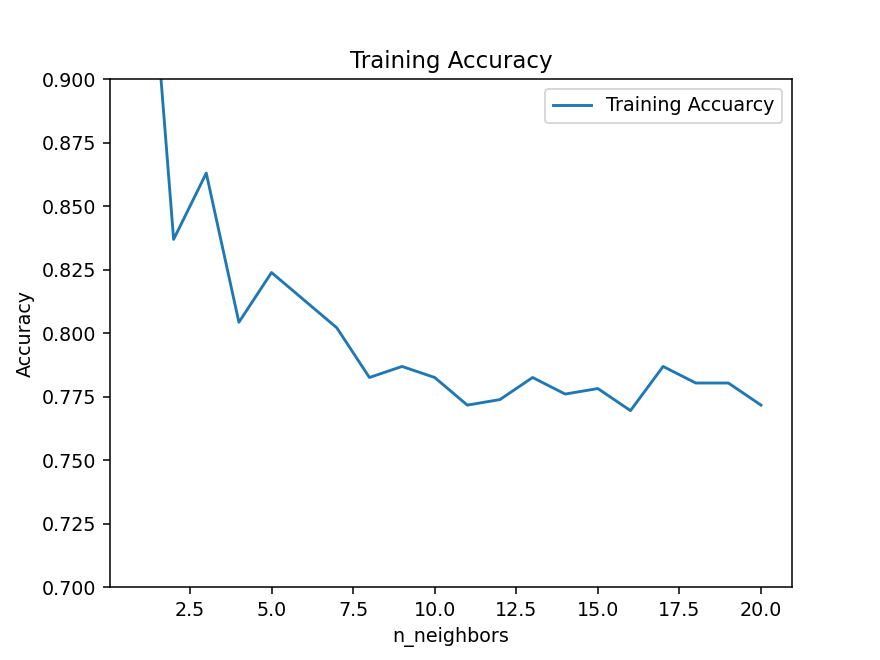

highest values for k against testing accuracy are
7	9	10	


In [36]:
plt.figure()
plt.plot(range(1, 21), training_accuracy.values(), label='Training Accuarcy')
plt.title('Training Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='best')
plt.show()

print("highest values for k against testing accuracy are"+"\n"+"7"+"\t"+"9"+"\t"+"10"+"\t")

In [37]:
def knn(neighbor):
    knn = KNeighborsClassifier(n_neighbors = neighbor,metric='minkowski')
    #fiting the  training set 
    knn.fit(X_train, y_train)
    Pred_y = knn.predict(X_test)
    #accuracy , confusion and classification report.
    print("The Accuracy is:",accuracy_score(y_test,Pred_y)*100,"\n")
    print("Confusion Matrix is for neighbor:"+str(neighbor)+ " \n",'\n')
    metrics.plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues,display_labels=["Diabetes","No Diabetes"])
    plt.show()
    print("Classification Report: \n",classification_report(y_test,Pred_y))
    plt.savefig('test1.png', bbox_inches='tight')

The Accuracy is: 80.51948051948052 

Confusion Matrix is for neighbor:7 
 



<IPython.core.display.Javascript object>


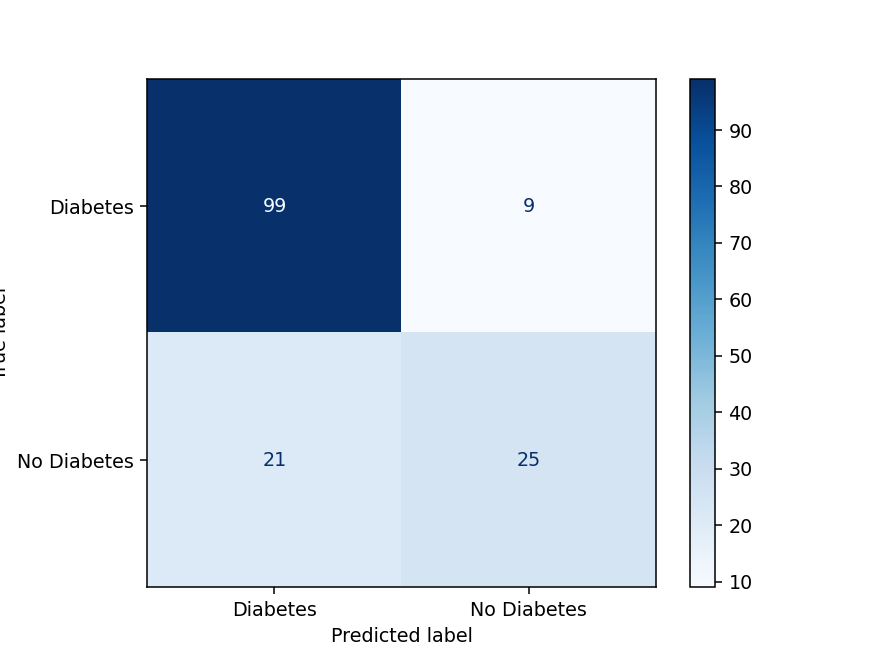

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       108
           1       0.74      0.54      0.62        46

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



In [38]:
knn(7)

The Accuracy is: 83.11688311688312 

Confusion Matrix is for neighbor:9 
 



<IPython.core.display.Javascript object>


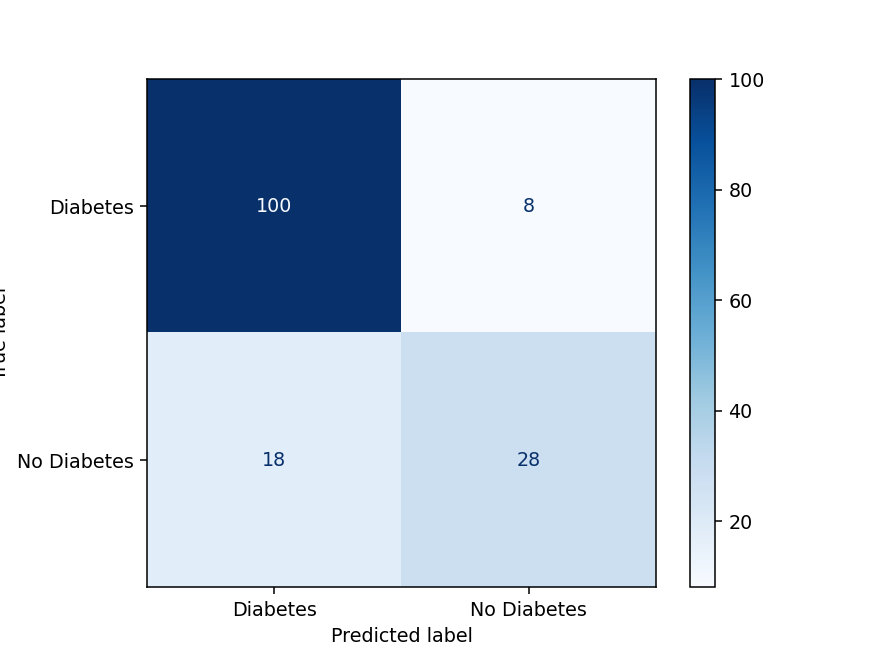

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.88       108
           1       0.78      0.61      0.68        46

    accuracy                           0.83       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.83      0.83      0.82       154



In [39]:
knn(9)

The Accuracy is: 80.51948051948052 

Confusion Matrix is for neighbor:10 
 



<IPython.core.display.Javascript object>


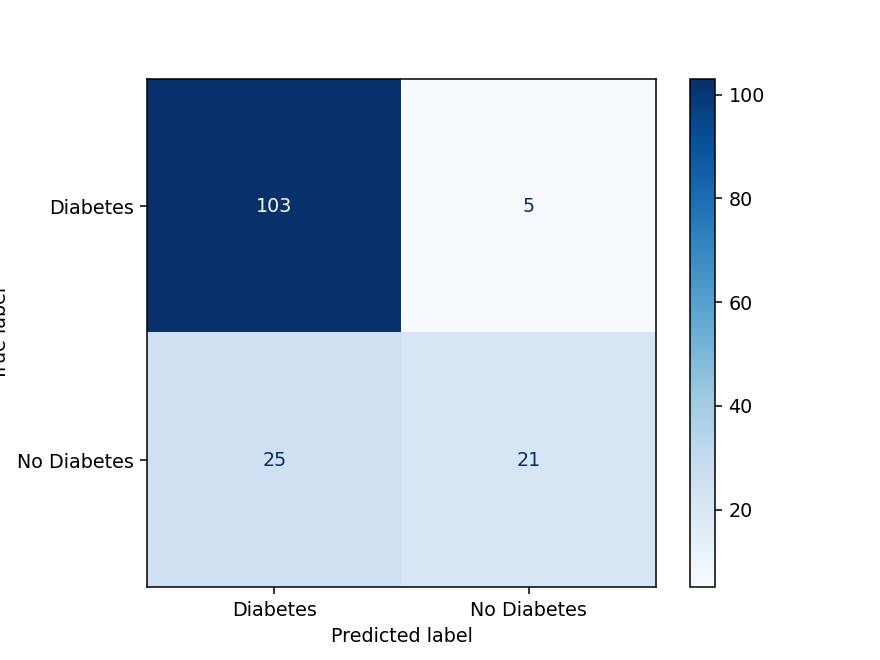

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       108
           1       0.81      0.46      0.58        46

    accuracy                           0.81       154
   macro avg       0.81      0.71      0.73       154
weighted avg       0.81      0.81      0.79       154



In [40]:
knn(10)

<IPython.core.display.Javascript object>


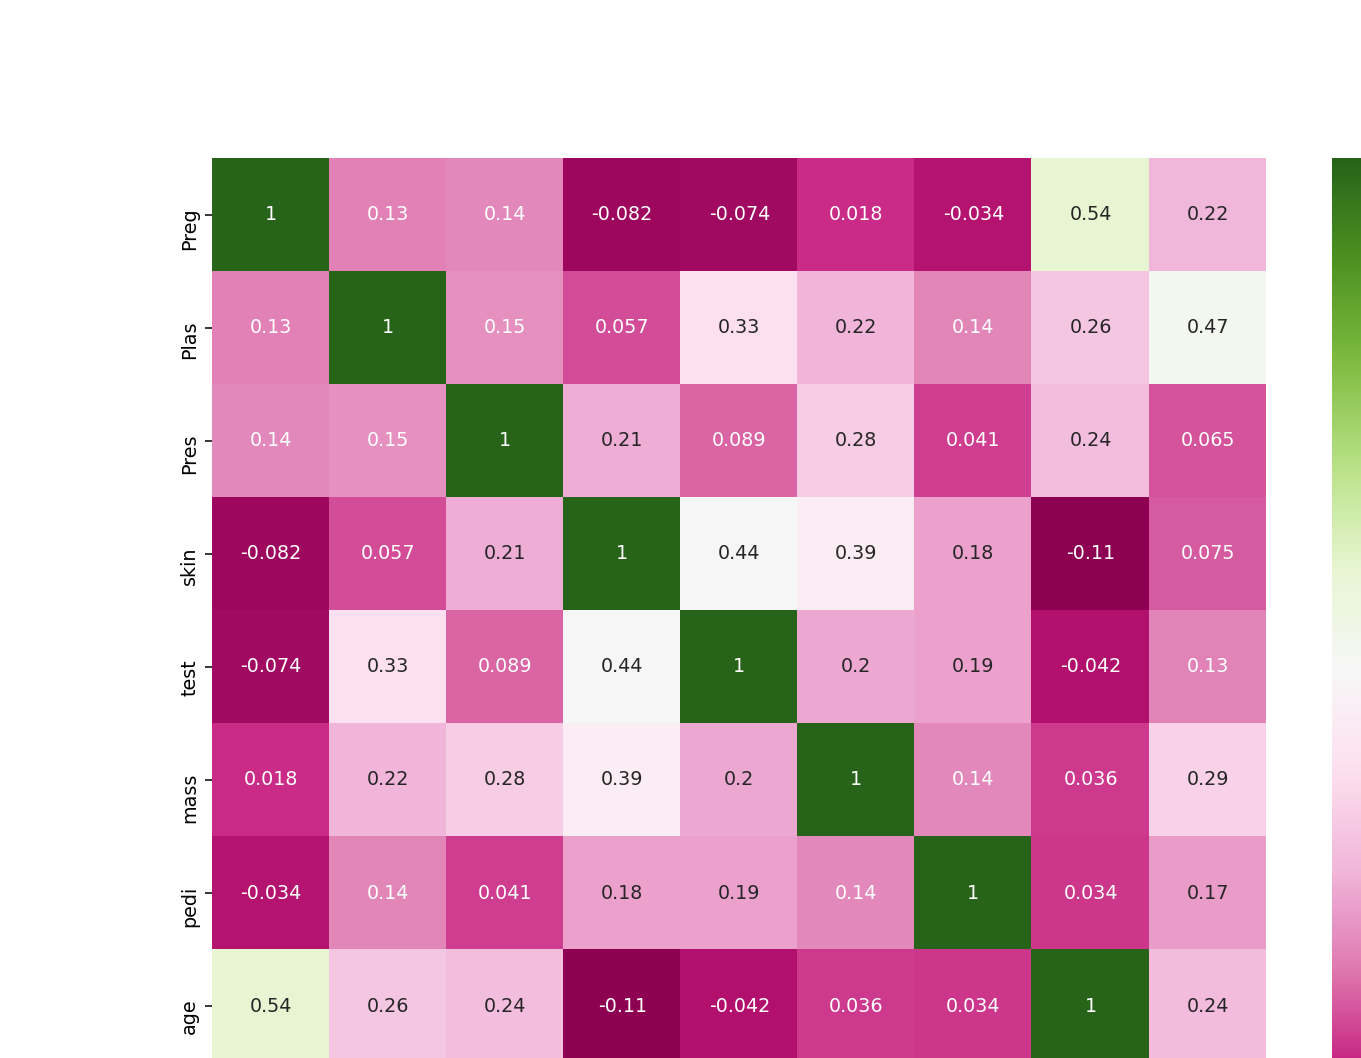

<AxesSubplot:>

In [41]:
plt.subplots(figsize=(9,7))
sns.heatmap(db.corr(), annot=True,cmap = "PiYG", cbar=True)